In [1]:
import os

In [2]:
from modules.pipeline import *

modules.report successfull loaded: 100%|██████████| 6/6 [00:44<00:00,  7.47s/it]


In [3]:
from unidecode import unidecode
import re

In [4]:
def get_filenames(root_dir, func, verbose=False):
    data_filenames = []
    # Walk through the directories and files
    for dirpath, dirnames, filenames in os.walk(root_dir):
        # dirpath: current directory path
        # dirnames: list of directories in the current directory
        # filenames: list of files in the current directory

        # Print the current directory
        print('Directory:', dirpath)  if verbose else None
        # Print all the subdirectories
        if verbose:
            for dirname in dirnames:
                print('Subdirectory:', os.path.join(dirpath, dirname))

        # Print all the files
        for filename in filenames:
            if func(filename) and not ('x_' in filename or 'y_' in filename or 'metric' in filename):
                print('File:', os.path.join(dirpath, filename)) if verbose else None
                data_filenames.append(os.path.join(dirpath, filename))

        # Print an empty line to separate directories
        print()  if verbose else None
    return data_filenames

In [5]:
MLN_F = lambda x: (('classic_mln_' in x) and not('classic_mln_-' in x)) # find metric of model where mln were added
MLN__F = lambda x: (('classic_mln_-' in x)) # where mln attribut were removed first
MLN_C_F = lambda x: (('classic_-' in x)) # where mln attribut were removed first
MLN_C= lambda x: (('classic_' in x)) # where mln attribut were removed first

INTER_F = lambda x: (not('_max_' in x) and ('inter' in x))
INTRA_F = lambda x: (not('_max_' in x) and ('intra' in x))
COMBINE_F = lambda x: (not('_max_' in x) and ('combine' in x))
ULTRA_F = lambda x: (not('_max_' in x) and ('ultra' in x))
INTER_MAX_F = lambda x: (('_max_' in x) and ('inter' in x))
INTRA_MAX_F = lambda x: (('_max_' in x) and ('intra' in x))
COMBINE_MAX_F = lambda x: (('_max_' in x) and ('combine' in x))
ULTRA_MAX_F = lambda x: (('_max_' in x) and ('ultra' in x))
DEGREE_F = lambda x: (('degree' in x))

In [22]:
def metrics_analyzer(cols=None, outputs_path=None, cwd=None, data_folder=None, classic_metrics=None, models_name=None):
    """ build relevance results about the datasset
    
    Args:
        - cols: list of qualitative variable in the dataset
        - outputs_path: the path where the experimental results are located
        - 
    
    Returns:
        A dedicated folder with those relevante reports and charts
    
    """
    outputs = {}
    
    if cols != None or classic_metrics != None: # check if cols and classics metrics are filled
        ## analyse of k layer
        for k in list(set([1, 2, len(cols)])):
            #for logic in ['global', 'personalized']:
            #outputs[logic] = {}
            ### get all combination of col
            for layer_config in get_combinations(range(len(cols)),k): # create subsets of k index of OHE and fetch it
                col_targeted= [f'{cols[i]}' for i in layer_config]
                case_k= '±'.join(col_targeted) if len(layer_config)>1 else col_targeted[0]
                if sum(
                        [
                            re.sub(r'[^\w\s]', '', unidecode(partern)) in re.sub(r'[^\w\s]', '', unidecode('cb_person_default_on_file±loan_intent'))
                            for partern in case_k.split("±")
                            ]
                        ) == k: # check mission context
                    continue
                print(case_k)
                
                ### get files for distincts logic
                match= lambda x: (
                    sum(
                        [
                            re.sub(r'[^\w\s]', '', unidecode(partern)) in re.sub(r'[^\w\s]', '', unidecode(x))
                            for partern in case_k.split("±")
                            ]
                        ) == k if k > 1 else re.sub(r'[^\w\s]', '', unidecode(case_k)) in re.sub(r'[^\w\s]', '', unidecode(x))
                    )
                files = {
                    'global':{
                        'classic': classic_metrics,
                        'classic_-_mlna':[
                            load_data_set_from_url(path=file,sep='\t', encoding='utf-8',index_col=0, na_values=None) 
                            for file in get_filenames(
                                root_dir=f'{outputs_path}/qualitative/mlna_{k}/data_selection_storage', 
                                func=lambda x: ((MLN_C_F(x)) and (match(x))), 
                                verbose=False
                                )
                            ][-1],
                        'classic_mln':[
                            load_data_set_from_url(path=file,sep='\t', encoding='utf-8',index_col=0, na_values=None) 
                            for file in get_filenames(
                                root_dir=f'{outputs_path}/qualitative/mlna_{k}/global/data_selection_storage', 
                                func=lambda x: ((MLN_F(x)) and (match(x))), 
                                verbose=False
                                )
                            ][-1],
                        'classic_mln_-_mlna':[
                            load_data_set_from_url(path=file,sep='\t', encoding='utf-8',index_col=0, na_values=None) 
                            for file in get_filenames(
                                root_dir=f'{outputs_path}/qualitative/mlna_{k}/global/data_selection_storage', 
                                func=lambda x: ((MLN__F(x)) and (match(x))), 
                                verbose=False
                                )
                            ][-1]
                    },
                    "personalized":{
                        'classic': classic_metrics,
                        'classic_-_mlna':[
                            load_data_set_from_url(path=file,sep='\t', encoding='utf-8',index_col=0, na_values=None) 
                            for file in get_filenames(
                                root_dir=f'{outputs_path}/qualitative/mlna_{k}/data_selection_storage', 
                                func=lambda x: ((MLN_C_F(x)) and (match(x))), 
                                verbose=False
                                )
                            ][-1],
                        'classic_mln':[
                            load_data_set_from_url(path=file,sep='\t', encoding='utf-8',index_col=0, na_values=None) 
                            for file in get_filenames(
                                root_dir=f'{outputs_path}/qualitative/mlna_{k}/personalized/data_selection_storage', 
                                func=lambda x: ((MLN_F(x)) and (match(x))), 
                                verbose=False
                                )
                            ][-1],
                        'classic_mln_-_mlna':[
                            load_data_set_from_url(path=file,sep='\t', encoding='utf-8',index_col=0, na_values=None) 
                            for file in get_filenames(
                                root_dir=f'{outputs_path}/qualitative/mlna_{k}/personalized/data_selection_storage', 
                                func=lambda x: ((MLN__F(x)) and (match(x))), 
                                verbose=False
                                )
                            ][-1]
                    }
                }
                # print(files)
                #outputs[logic] = files
                ### transform and normalize
                models_list = files['personalized']['classic'].index.values.tolist()
                print(models_list)
                metrics = ["accuracy","precision","recall","f1-score"]
                models = {}
                models_1 = {}
                for model in models_list:
                    data = {
                        'global':{},
                        'personalized':{}
                    }
                    for key in files['global'].keys():
                        data['global'][key] = [files['global'][key].loc[model,metric] for metric in metrics]
                        data['personalized'][key] = [files['personalized'][key].loc[model,metric] for metric in metrics]

                    data['global']['Metrics'] = metrics
                    data['personalized']['Metrics'] = metrics
                    models[model] = pd.DataFrame(data=data['global'])
                    models_1[model] = pd.DataFrame(data=data['personalized'])
                ### generate figures
                nrow = 2
                ncol = 4
                
                fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 15))
                count=0
                for r in range(ncol): 
                    # Barplot i
                    models[models_list[count]].plot(kind='bar', x='Metrics', y=files['global'].keys(), ax=axs[0,r])
                    axs[0,r].set_title(f'{models_name[models_list[count]]}')
                    
                    models_1[models_list[count]].plot(kind='bar', x='Metrics', y=files['personalized'].keys(), ax=axs[1,r])
                    axs[1,r].set_title(f'{models_name[models_list[count]]}')
                    
                    axs[0,r].legend().set_visible(False)
                    axs[1,r].legend().set_visible(False)
                    if r == ncol-1:
                        axs[1,r].legend().set_visible(True)
                    count+=1
                axs[0,0].set_ylabel('global')
                axs[1,0].set_ylabel('personalized')
                if True:
                    create_domain(f'{cwd}/analyser/{data_folder}/plots/mlna_{k}/mixed')

                    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
                    filename1 = f'{cwd}/analyser/{data_folder}/plots/mlna_{k}/mixed/_metrics_comparaison_for_{case_k}'+'_'+timestr+'.png'
                    # Adjust the layout to cover all content
                    plt.tight_layout()

                    plt.savefig(filename1,dpi=150) #.png,.pdf will also support here
                    plt.close() # close the plot windows
                ### generate reports
    return outputs



In [7]:
get_qualitative_from_cols = lambda x:(list(set([
    var.split("__")[1] for var in [
        coll 
        for coll in [
            col 
            for col in x 
                if not (
                    ('precision' in col ) 
                    or ('accuracy' in col ) 
                    or ('recall' in col) 
                    or ('f1-score' in col)
                )
            ] 
            if ("__" in coll)
        ]
    ]
)))

In [26]:
def analyzer_launcher(outputs_name=None):
    
    #for dataset_name in ['CREDIT_RISK_DATASET']:
    for dataset_name in [dirnames for _, dirnames, _ in os.walk(f'{os.getcwd()}/{outputs_name}')][0]:
        print(dataset_name)
        classic_f = [
                        load_data_set_from_url(path=file,sep='\t', encoding='utf-8',index_col=0, na_values=None) 
                        for file in get_filenames(
                            root_dir=f'{os.getcwd()}/{outputs_name}/{dataset_name}/data_selection_storage', 
                            func=MLN_C, 
                            verbose=False
                            )
                        ][-1]
        quali_col = get_qualitative_from_cols(classic_f.columns.to_list())
        models = model_desc()
        metrics_analyzer(
            cols=quali_col, 
            outputs_path=f'{os.getcwd()}/{outputs_name}/{dataset_name}', 
            cwd=os.getcwd(), 
            data_folder=dataset_name, 
            classic_metrics=classic_f, 
            models_name=models
            )
        

owner
['xgb', 'dtc', 'lrc', 'rfc']
Directory '/Users/djiemboutientcheuvictornico/Documents/M2/Thesis/implementation/scripting/analyser/AER/plots/mlna_1/mixed' created successfully.
selfemp
['xgb', 'dtc', 'lrc', 'rfc']
Directory '/Users/djiemboutientcheuvictornico/Documents/M2/Thesis/implementation/scripting/analyser/AER/plots/mlna_1/mixed' already exists.
owner±selfemp
['xgb', 'dtc', 'lrc', 'rfc']
Directory '/Users/djiemboutientcheuvictornico/Documents/M2/Thesis/implementation/scripting/analyser/AER/plots/mlna_2/mixed' created successfully.
Fonction
['xgb', 'dtc', 'lrc', 'rfc']
Directory '/Users/djiemboutientcheuvictornico/Documents/M2/Thesis/implementation/scripting/analyser/AFB/plots/mlna_1/mixed' created successfully.
Sit.Matrim
['xgb', 'dtc', 'lrc', 'rfc']
Directory '/Users/djiemboutientcheuvictornico/Documents/M2/Thesis/implementation/scripting/analyser/AFB/plots/mlna_1/mixed' already exists.
Motif
['xgb', 'dtc', 'lrc', 'rfc']
Directory '/Users/djiemboutientcheuvictornico/Document

KeyboardInterrupt: 

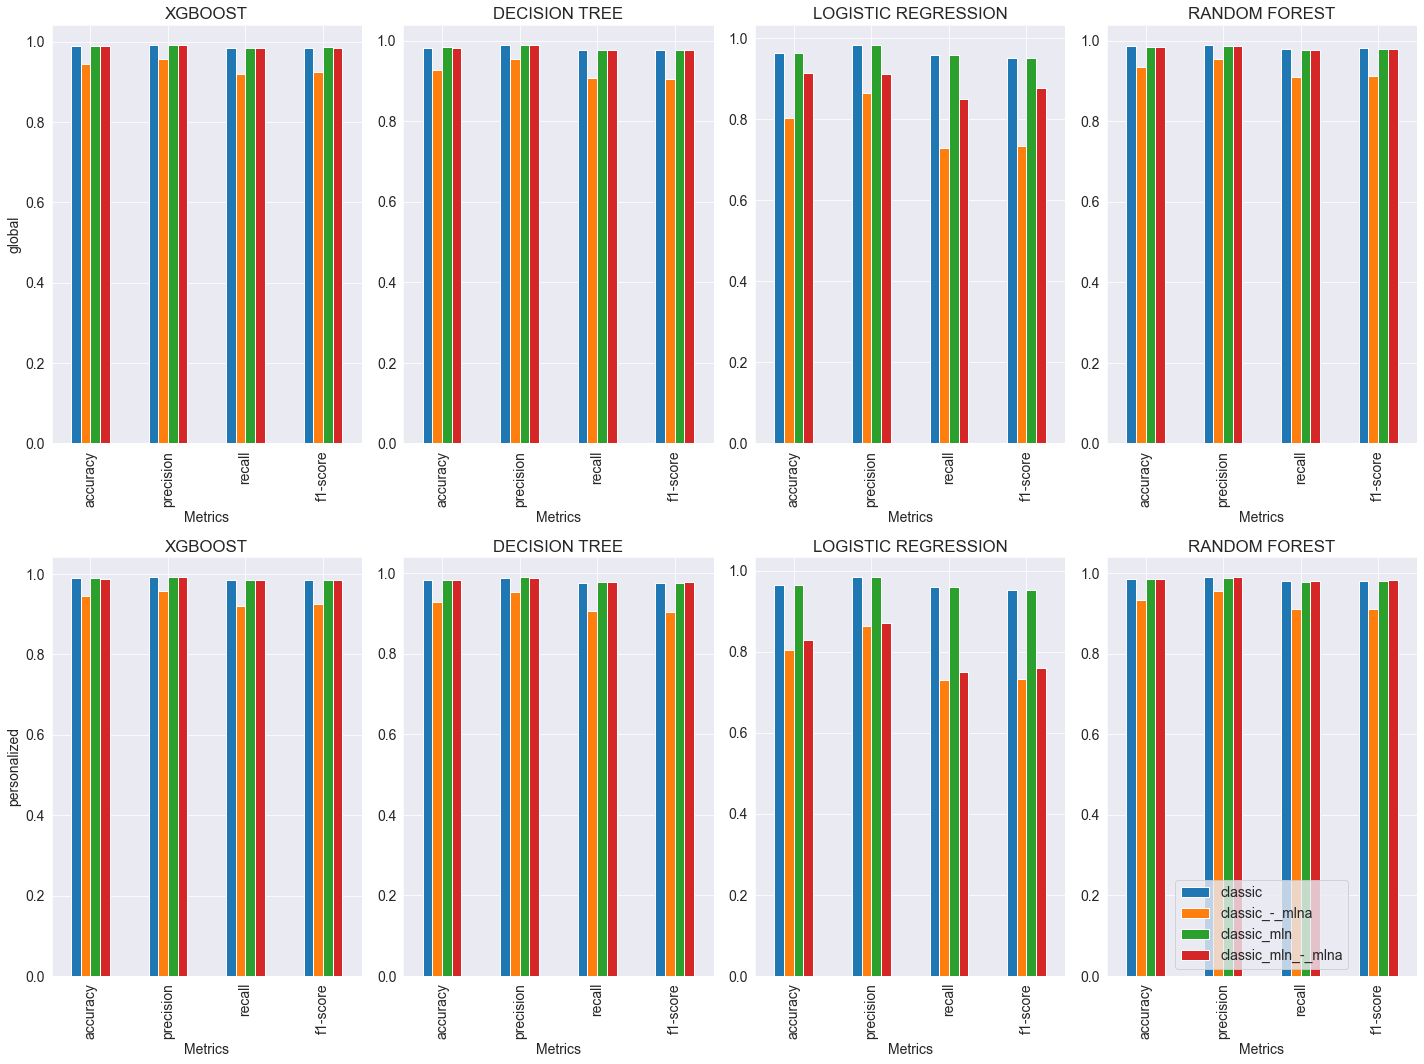

In [25]:
analyzer_launcher(outputs_name="outputs_s")